In [1]:
import tellurium as te
import sbmlIO as se
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = te.loada("model")

In [3]:
odes = se.getODEsFromModel(r)

In [4]:
print(odes)


v_J0 = k1*S1
v_J1 = k2*S2

dS1/dt = -v_J0 + v_J1
dS2/dt = v_J0 - v_J1



In [5]:
speciesIds, speciesValues, parameterIds, parameterValues, derivatives = se.parseODEs(r,odes)

{'dS1/dt': '-v_J0 + v_J1', 'dS2/dt': 'v_J0 - v_J1'}
{'v_J0': 'k1*S1', 'v_J1': 'k2*S2'}


In [6]:
r.exportToSBML("model.xml")

In [7]:
odes = se.getODEsFromSBMLFile("model.xml")

In [8]:
r = te.loadSBMLModel("model.xml")

In [9]:
speciesIds, speciesValues, parameterIds, parameterValues, derivatives = se.parseODEs(r,odes)

{'dS1/dt': '-v_J0 + v_J1', 'dS2/dt': 'v_J0 - v_J1'}
{'v_J0': 'k1*S1', 'v_J1': 'k2*S2'}


In [10]:
se.writePython(speciesIds,speciesValues,parameterIds,parameterValues,derivatives,"./","out.py")

In [11]:
from out import model

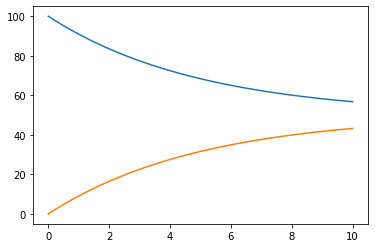

In [12]:
y0 = np.array([float(value) for value in speciesValues])
params = np.array([float(value) for value in parameterValues])
TMAX = 10
NSTEPS = 100

time = np.linspace(0,TMAX,NSTEPS)
sol = odeint(model, y0, time, args=(params,)) # scipy-Fortran RK4 solver
for i in range(sol.shape[1]):
    plt.plot(time,sol[:,i]);